# Drinking age with a scikit-learn model

Run the 'drinking example' from the RDD chapter of [Causal Inference for the Brave and True](https://matheusfacure.github.io/python-causality-handbook/16-Regression-Discontinuity-Design.html).

Use sci-kit learn models

In [1]:
from sklearn.linear_model import LinearRegression

import causalpy as cp

In [2]:
df = (
    cp.load_data("drinking")
    .rename(columns={"agecell": "age"})
    .assign(treated=lambda df_: df_.age > 21)
    .dropna(axis=0)
)

In [3]:
result = cp.skl_experiments.RegressionDiscontinuity(
    df,
    formula="all ~ 1 + age + treated",
    running_variable_name="age",
    model=LinearRegression(),
    treatment_threshold=21,
)

## Examine results

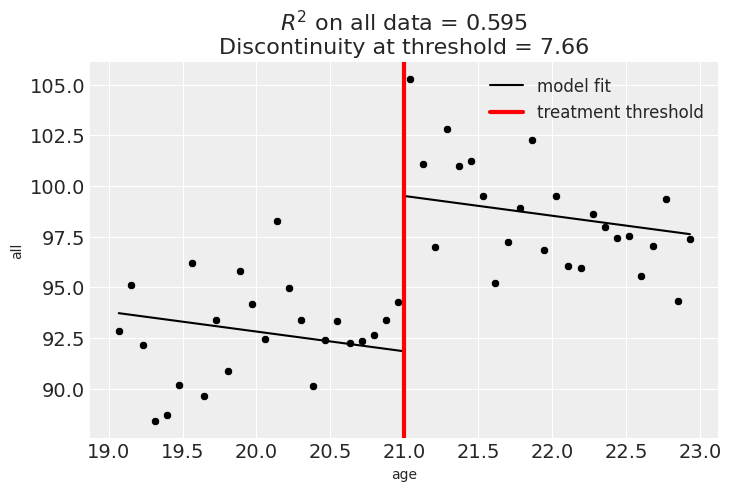

In [4]:
result.plot();

In [5]:
result.summary()

Difference in Differences experiment
Formula: all ~ 1 + age + treated
Running variable: age
Threshold on running variable: 21

Results:
Discontinuity at threshold = 7.66
Model coefficients:
	Intercept		0.0
	treated[T.True]		7.662711631820951
	age		-0.9746855447910265
